In [1]:
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import sweetviz as sv
import numpy as np

import sys
sys.path.insert(1, '../utils')
from run_models.train_predict import train_model, predict_model



In [2]:
data = pd.read_csv(r"..\data\pdmod_base_model.csv")
data.head()

,nit_enmascarado,num_oblig_enmascarado,num_oblig_orig_enmascarado,fecha_var_rpta_alt,f_cruce,sd_avg_dia_sld_cap_final,sd_max_dia_sld_cap_final,sd_min_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,sd_min_dia_nueva_altura_mora,sd_avg_dia_vlr_obligacion,sd_max_dia_vlr_obligacion,sd_min_dia_vlr_obligacion,sd_stddevpop_dia_vlr_obligacion,sd_avg_dia_vlr_vencido,sd_max_dia_vlr_vencido,sd_min_dia_vlr_vencido,sd_stddevpop_dia_vlr_vencido,mc_valor_cuota_mes,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,var_rpta_alt,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura
0,206107,416874,663468,202310,202309,1.913234e+07,19132341.79,19132341.79,0.000000e+00,15.0,0.0,1.970512e+07,19953951.0,19474893.0,1.407361e+05,3.048674e+05,573697.0,0.0,285184.637715,573391.0,0.0,0.0,7000000.0,84249000.0,3000000.0,81249000.0,1.0,0.909242,0.157584,0.778246
1,516641,285582,794760,202312,202311,2.700988e+07,30010981.00,0.00,9.003294e+06,57.0,28.0,2.934687e+07,33057961.0,1837490.0,9.198025e+06,2.920259e+06,3179267.0,1580725.0,532514.257419,1581692.0,0.0,0.0,21000000.0,220000000.0,7200000.0,220000000.0,1.0,0.616857,0.704380,0.168679
2,268533,474097,606245,202310,202309,1.514015e+06,1514015.00,1514015.00,0.000000e+00,17.0,0.0,1.545966e+06,1562344.0,1530415.0,8.759113e+03,2.987740e+04,52940.0,0.0,26127.151212,52552.0,0.0,0.0,3025000.0,44088000.0,300000.0,43788000.0,1.0,0.926218,0.196802,0.721480
3,599786,80392,999950,202312,202311,5.000000e+05,500000.00,500000.00,0.000000e+00,47.0,18.0,5.360467e+05,542393.0,529035.0,4.069038e+03,2.100027e+04,37079.0,0.0,18364.203480,37036.0,0.0,0.0,13073127.0,239119000.0,800000.0,239119000.0,0.0,0.652494,0.601985,0.550304
4,190304,476630,603712,202309,202308,2.200728e+07,22041612.66,21509424.95,1.307426e+05,57.0,0.0,2.293860e+07,23034558.0,22161291.0,1.482903e+05,8.537152e+05,919460.0,53245.0,184324.900802,919734.0,60165.0,7.0,1800000.0,38098000.0,400000.0,38098000.0,0.0,0.749377,0.793562,0.085022


In [3]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680800 entries, 0 to 680799
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   nit_enmascarado                  680800 non-null  int64  
 1   num_oblig_enmascarado            680800 non-null  int64  
 2   num_oblig_orig_enmascarado       680800 non-null  int64  
 3   fecha_var_rpta_alt               680800 non-null  int64  
 4   f_cruce                          680800 non-null  int64  
 5   sd_avg_dia_sld_cap_final         679517 non-null  float64
 6   sd_max_dia_sld_cap_final         679517 non-null  float64
 7   sd_min_sld_cap_final             679517 non-null  float64
 8   sd_stddevpop_dia_sld_cap_final   679517 non-null  float64
 9   sd_max_dia_nueva_altura_mora     679517 non-null  float64
 10  sd_min_dia_nueva_altura_mora     679517 non-null  float64
 11  sd_avg_dia_vlr_obligacion        679517 non-null  float64
 12  sd

In [4]:
# df_report = data[data["fecha_var_rpta_alt"] < 202401]
# df_report = df_report.drop(columns=["nit_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"])
# report = sv.analyze([df_report, 'Train'], target_feat='var_rpta_alt')
# report.show_html('data_analysis/base_model_analysis.html')

In [5]:
vars_model = [
    "sd_avg_dia_sld_cap_final",
    "sd_stddevpop_dia_sld_cap_final",
    "sd_max_dia_nueva_altura_mora",
    "sd_min_dia_nueva_altura_mora",
    "sd_stddevpop_dia_vlr_obligacion",
    "sd_avg_dia_vlr_vencido",
    "sd_max_dia_vlr_vencido",
    "sd_min_dia_vlr_vencido",
    "sd_stddevpop_dia_vlr_vencido",
    "mc_valor_cuota_mes",
    "mc_pago_total"	,
    "mc_porc_pago"	,
    "mcd_total_ing"	,
    "mcd_tot_activos"	,
    "mcd_egresos_mes",
    "mcd_tot_patrimonio"	,
    "pd_prob_propension",
    "pd_prob_alrt_temprana",
    "pd_prob_auto_cura",
    "var_rpta_alt"
]

In [6]:
data_model = data[data["fecha_var_rpta_alt"] < 202401]
data_model = data_model[vars_model]

In [7]:
data_model.isna().sum()

sd_avg_dia_sld_cap_final           1088
sd_stddevpop_dia_sld_cap_final     1088
sd_max_dia_nueva_altura_mora       1088
sd_min_dia_nueva_altura_mora       1088
sd_stddevpop_dia_vlr_obligacion    1088
sd_avg_dia_vlr_vencido             1088
sd_max_dia_vlr_vencido             1088
sd_min_dia_vlr_vencido             1088
sd_stddevpop_dia_vlr_vencido       1088
mc_valor_cuota_mes                  984
mc_pago_total                       984
mc_porc_pago                       7583
mcd_total_ing                        10
mcd_tot_activos                      10
mcd_egresos_mes                      10
mcd_tot_patrimonio                   10
pd_prob_propension                 1888
pd_prob_alrt_temprana              1888
pd_prob_auto_cura                  1888
var_rpta_alt                          0
dtype: int64

In [8]:
(data_model < 0).sum()

sd_avg_dia_sld_cap_final           0
sd_stddevpop_dia_sld_cap_final     0
sd_max_dia_nueva_altura_mora       0
sd_min_dia_nueva_altura_mora       0
sd_stddevpop_dia_vlr_obligacion    0
sd_avg_dia_vlr_vencido             0
sd_max_dia_vlr_vencido             0
sd_min_dia_vlr_vencido             0
sd_stddevpop_dia_vlr_vencido       0
mc_valor_cuota_mes                 0
mc_pago_total                      0
mc_porc_pago                       0
mcd_total_ing                      0
mcd_tot_activos                    0
mcd_egresos_mes                    0
mcd_tot_patrimonio                 0
pd_prob_propension                 0
pd_prob_alrt_temprana              0
pd_prob_auto_cura                  0
var_rpta_alt                       0
dtype: int64

In [9]:
data_model = data_model.fillna(-99)

In [10]:
data_model.isna().sum()

sd_avg_dia_sld_cap_final           0
sd_stddevpop_dia_sld_cap_final     0
sd_max_dia_nueva_altura_mora       0
sd_min_dia_nueva_altura_mora       0
sd_stddevpop_dia_vlr_obligacion    0
sd_avg_dia_vlr_vencido             0
sd_max_dia_vlr_vencido             0
sd_min_dia_vlr_vencido             0
sd_stddevpop_dia_vlr_vencido       0
mc_valor_cuota_mes                 0
mc_pago_total                      0
mc_porc_pago                       0
mcd_total_ing                      0
mcd_tot_activos                    0
mcd_egresos_mes                    0
mcd_tot_patrimonio                 0
pd_prob_propension                 0
pd_prob_alrt_temprana              0
pd_prob_auto_cura                  0
var_rpta_alt                       0
dtype: int64

In [11]:

MM = MinMaxScaler()
data_model_norm = MM.fit_transform(data_model.drop(columns=["pd_prob_propension","pd_prob_alrt_temprana","pd_prob_auto_cura","var_rpta_alt"]))
data_model_norm = pd.DataFrame(data_model_norm, columns=data_model.columns[:-4])
data_model_norm.head()

,sd_avg_dia_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,sd_min_dia_nueva_altura_mora,sd_stddevpop_dia_vlr_obligacion,sd_avg_dia_vlr_vencido,sd_max_dia_vlr_vencido,sd_min_dia_vlr_vencido,sd_stddevpop_dia_vlr_vencido,mc_valor_cuota_mes,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio
0,0.012321,8.026977e-07,0.065593,0.059424,0.001104,0.000729,0.001342,2.402792e-07,0.001596,0.001248,9.523388e-08,2.739924e-07,2.333363e-06,0.000009,5.000165e-07,0.000008
1,0.017394,7.300003e-02,0.089758,0.076230,0.072098,0.006982,0.007434,3.836759e-03,0.002980,0.003443,9.523388e-08,2.739924e-07,7.000023e-06,0.000024,1.200016e-06,0.000022
2,0.000975,8.026977e-07,0.066743,0.059424,0.000069,0.000072,0.000124,2.402792e-07,0.000147,0.000115,9.523388e-08,2.739924e-07,1.008365e-06,0.000005,5.001650e-08,0.000004
3,0.000322,8.026977e-07,0.084005,0.070228,0.000033,0.000050,0.000087,2.402792e-07,0.000103,0.000081,9.523388e-08,2.739924e-07,4.357736e-06,0.000027,1.333498e-07,0.000024
4,0.014172,1.060871e-03,0.089758,0.059424,0.001163,0.002041,0.002150,1.294692e-04,0.001032,0.002002,5.797146e-05,2.933656e-07,6.000322e-07,0.000004,6.668317e-08,0.000004


In [12]:
data_model_norm["pd_prob_propension"] = data_model["pd_prob_propension"].values
data_model_norm["pd_prob_alrt_temprana"] = data_model["pd_prob_alrt_temprana"].values
data_model_norm["pd_prob_auto_cura"] = data_model["pd_prob_auto_cura"].values
data_model_norm["var_rpta_alt"] = data_model["var_rpta_alt"].values
data_model_norm.head()

,sd_avg_dia_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,sd_min_dia_nueva_altura_mora,sd_stddevpop_dia_vlr_obligacion,sd_avg_dia_vlr_vencido,sd_max_dia_vlr_vencido,sd_min_dia_vlr_vencido,sd_stddevpop_dia_vlr_vencido,mc_valor_cuota_mes,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura,var_rpta_alt
0,0.012321,8.026977e-07,0.065593,0.059424,0.001104,0.000729,0.001342,2.402792e-07,0.001596,0.001248,9.523388e-08,2.739924e-07,2.333363e-06,0.000009,5.000165e-07,0.000008,0.909242,0.157584,0.778246,1.0
1,0.017394,7.300003e-02,0.089758,0.076230,0.072098,0.006982,0.007434,3.836759e-03,0.002980,0.003443,9.523388e-08,2.739924e-07,7.000023e-06,0.000024,1.200016e-06,0.000022,0.616857,0.704380,0.168679,1.0
2,0.000975,8.026977e-07,0.066743,0.059424,0.000069,0.000072,0.000124,2.402792e-07,0.000147,0.000115,9.523388e-08,2.739924e-07,1.008365e-06,0.000005,5.001650e-08,0.000004,0.926218,0.196802,0.721480,1.0
3,0.000322,8.026977e-07,0.084005,0.070228,0.000033,0.000050,0.000087,2.402792e-07,0.000103,0.000081,9.523388e-08,2.739924e-07,4.357736e-06,0.000027,1.333498e-07,0.000024,0.652494,0.601985,0.550304,0.0
4,0.014172,1.060871e-03,0.089758,0.059424,0.001163,0.002041,0.002150,1.294692e-04,0.001032,0.002002,5.797146e-05,2.933656e-07,6.000322e-07,0.000004,6.668317e-08,0.000004,0.749377,0.793562,0.085022,0.0


In [13]:
data_model_norm.isna().sum()

sd_avg_dia_sld_cap_final           0
sd_stddevpop_dia_sld_cap_final     0
sd_max_dia_nueva_altura_mora       0
sd_min_dia_nueva_altura_mora       0
sd_stddevpop_dia_vlr_obligacion    0
sd_avg_dia_vlr_vencido             0
sd_max_dia_vlr_vencido             0
sd_min_dia_vlr_vencido             0
sd_stddevpop_dia_vlr_vencido       0
mc_valor_cuota_mes                 0
mc_pago_total                      0
mc_porc_pago                       0
mcd_total_ing                      0
mcd_tot_activos                    0
mcd_egresos_mes                    0
mcd_tot_patrimonio                 0
pd_prob_propension                 0
pd_prob_alrt_temprana              0
pd_prob_auto_cura                  0
var_rpta_alt                       0
dtype: int64

In [14]:
# report = sv.analyze(data_model_norm, target_feat='var_rpta_alt')
# report.show_html('data_analysis/base_model_analysis_norm.html')

In [15]:
best_model = train_model(data_model_norm, "var_rpta_alt")

,Description,Value
0,Session id,123
1,Target,var_rpta_alt
2,Target type,Binary
3,Original data shape,"(568251, 20)"
4,Transformed data shape,"(568251, 20)"
5,Transformed train set shape,"(397775, 20)"
6,Transformed test set shape,"(170476, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


2024/06/22 16:59:04 INFO mlflow.tracking.fluent: Experiment with name 'base' does not exist. Creating a new experiment.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6667,0.7290,0.6207,0.6633,0.6413,0.3306,0.3313,1.6920
lr,Logistic Regression,0.6037,0.6402,0.5307,0.5983,0.5625,0.2027,0.2039,1.7440
svm,SVM - Linear Kernel,0.5755,0.6190,0.3837,0.5888,0.4644,0.1381,0.1469,1.5460


In [21]:
best_model = best_model[0]
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [22]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

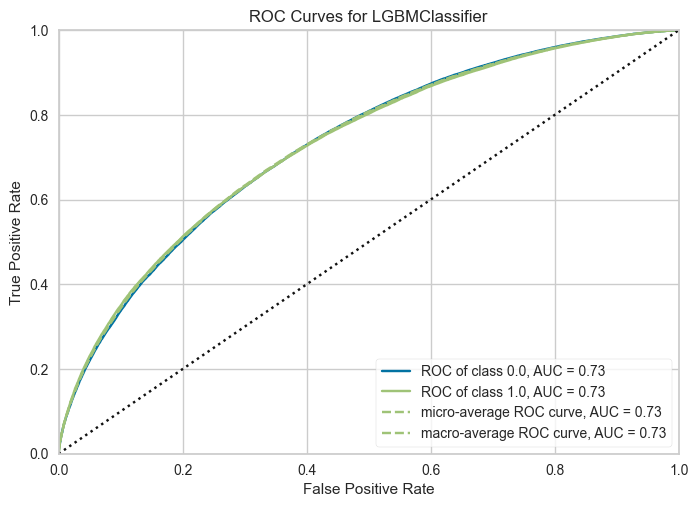

In [25]:

plot_model(best_model, plot = 'auc')

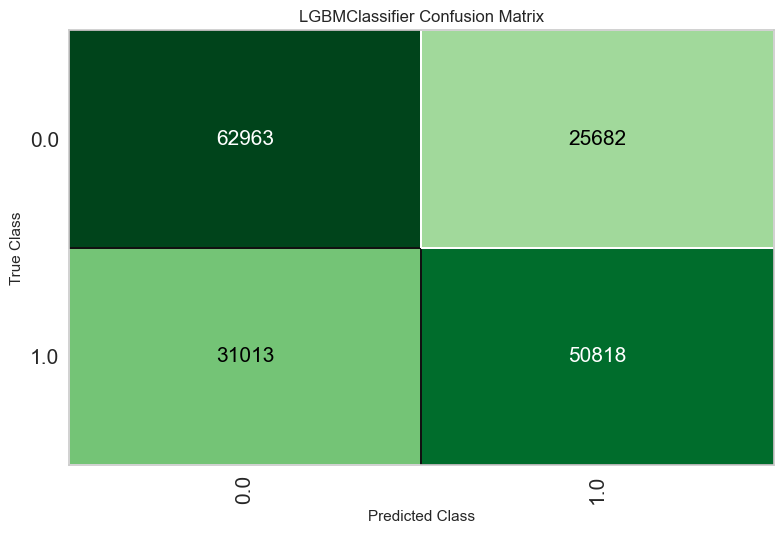

In [26]:
# functional API
plot_model(best_model, plot = 'confusion_matrix')

In [44]:
data_calification = data[data["fecha_var_rpta_alt"] == 202401]
data_calification.head()

,nit_enmascarado,num_oblig_enmascarado,num_oblig_orig_enmascarado,fecha_var_rpta_alt,f_cruce,sd_avg_dia_sld_cap_final,sd_max_dia_sld_cap_final,sd_min_sld_cap_final,sd_stddevpop_dia_sld_cap_final,sd_max_dia_nueva_altura_mora,...,mc_pago_total,mc_porc_pago,mcd_total_ing,mcd_tot_activos,mcd_egresos_mes,mcd_tot_patrimonio,var_rpta_alt,pd_prob_propension,pd_prob_alrt_temprana,pd_prob_auto_cura
9,32009,258911,821431,202401,202312,5206813.60,5206813.60,5206813.60,0.0,16.0,...,0.0,0.0,2101000.0,11120000.0,1299000.0,10730000.0,NaN,0.752607,0.300231,0.717270
16,438155,359990,720352,202401,202312,3202323.19,3202323.19,3202323.19,0.0,28.0,...,1053200.0,300.0,1136000.0,1186000.0,0.0,1186000.0,NaN,0.563261,0.621301,0.263560
25,154076,25957,1054385,202401,202312,1738280.00,1738280.00,1738280.00,0.0,79.0,...,0.0,0.0,1600000.0,43509000.0,500000.0,43509000.0,NaN,0.393355,0.709314,0.245149
29,383376,1032500,72554,202401,202312,399999.62,399999.62,399999.62,0.0,59.0,...,0.0,0.0,1000000.0,0.0,200000.0,0.0,NaN,0.401072,0.576111,0.307052
35,263716,433720,646622,202401,202312,15987194.63,15987194.63,15987194.63,0.0,56.0,...,378000.0,51.0,1741906.0,98409000.0,50000.0,98409000.0,NaN,0.349025,0.676928,0.217047


In [52]:
data_calification = predict_model(best_model, data_calification, vars_model, scaler = MM)
new_dataframe = data_calification[["ID", "var_rpta_alt"]]
print(new_dataframe.isna().sum())

,ID,var_rpta_alt
9,32009#821431#258911,1
16,438155#720352#359990,0
25,154076#1054385#25957,0
29,383376#72554#1032500,0
35,263716#646622#433720,1


In [55]:
new_dataframe.to_csv(r"..\data\pdmod_base_model_calification.csv", index=False)